# Carga de librerías

In [61]:
import pandas as pd
import numpy as np

# Carga y limpieza de datos

In [62]:
# Cargar conjuntos de datos
train_csv = pd.read_csv('data/train.csv')
validation_csv = pd.read_csv('data/validation.csv')
test_csv = pd.read_csv('data/test.csv')

# Mostrar tamaño de los conjuntos de datos
print('Train cargado, tamaño:', train_csv.shape)
print('Validation cargado, tamaño:', validation_csv.shape)
print('Test cargado, tamaño:', test_csv.shape)

# Separar datos y etiquetas
feature_cols = train_csv.columns.values.tolist()[1:]
X_train = pd.DataFrame(train_csv[feature_cols], columns=feature_cols)
y_train = train_csv['RiskPerformance']
X_validation = pd.DataFrame(validation_csv[feature_cols], columns=feature_cols)
y_validation = validation_csv['RiskPerformance']
X_test = pd.DataFrame(test_csv[feature_cols], columns=feature_cols)
y_test = test_csv['RiskPerformance']

# Calcular cantidad de valores 'good' y 'bad' en los conjuntos de datos
num_good_train = train_csv[train_csv['RiskPerformance'] == 'Good'].shape[0]
num_bad_train = train_csv[train_csv['RiskPerformance'] == 'Bad'].shape[0]
num_good_validation = validation_csv[validation_csv['RiskPerformance'] == 'Good'].shape[0]
num_bad_validation = validation_csv[validation_csv['RiskPerformance'] == 'Bad'].shape[0]
num_good_test = test_csv[test_csv['RiskPerformance'] == 'Good'].shape[0]
num_bad_test = test_csv[test_csv['RiskPerformance'] == 'Bad'].shape[0]

print('Proporción de buenos y malos en train:', num_good_train, num_bad_train)
print('Proporción de buenos y malos en validation:', num_good_validation, num_bad_validation)
print('Proporción de buenos y malos en test:', num_good_test, num_bad_test)



Train cargado, tamaño: (6459, 24)
Validation cargado, tamaño: (2000, 24)
Test cargado, tamaño: (1888, 24)
Proporción de buenos y malos en train: 3109 3350
Proporción de buenos y malos en validation: 967 1033
Proporción de buenos y malos en test: 873 1015


In [63]:
X_train.corr()

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
ExternalRiskEstimate,1.000000,0.479307,0.359366,0.592418,0.468610,0.676582,0.735482,0.898680,0.096538,0.910030,...,0.366447,0.339322,0.634424,0.639455,0.038836,0.150844,0.508140,0.449846,0.512605,0.397877
MSinceOldestTradeOpen,0.479307,1.000000,0.231373,0.725659,0.415777,0.365326,0.378859,0.399076,0.116543,0.386551,...,0.076974,0.209583,0.277559,0.281671,0.025146,0.036354,0.388258,0.201135,0.342598,0.121536
MSinceMostRecentTradeOpen,0.359366,0.231373,1.000000,0.495377,-0.024735,0.307351,0.316753,0.254187,0.020069,0.306715,...,0.158918,0.083228,0.152211,0.154869,0.034602,-0.160085,0.071453,-0.009313,0.093272,0.195569
AverageMInFile,0.592418,0.725659,0.495377,1.000000,0.355863,0.469563,0.479169,0.453117,0.125298,0.467625,...,0.106861,0.190357,0.307676,0.312565,0.027030,-0.055043,0.377434,0.146086,0.354291,0.185279
NumSatisfactoryTrades,0.468610,0.415777,-0.024735,0.355863,1.000000,0.415762,0.443832,0.572322,0.123349,0.473370,...,0.173361,0.239208,0.468487,0.470322,0.143105,0.290759,0.677298,0.536979,0.561614,0.192991
NumTrades60Ever2DerogPubRec,0.676582,0.365326,0.307351,0.469563,0.415762,1.000000,0.975229,0.665779,0.272283,0.697457,...,0.483416,0.282127,0.700373,0.704686,0.327136,0.243898,0.567557,0.520156,0.538381,0.585316
NumTrades90Ever2DerogPubRec,0.735482,0.378859,0.316753,0.479169,0.443832,0.975229,1.000000,0.743576,0.245884,0.753512,...,0.491668,0.300085,0.725192,0.729806,0.322323,0.252604,0.590604,0.536290,0.561527,0.597054
PercentTradesNeverDelq,0.898680,0.399076,0.254187,0.453117,0.572322,0.665779,0.743576,1.000000,0.047364,0.907770,...,0.395751,0.336682,0.705086,0.709670,0.234525,0.258060,0.643881,0.538986,0.630650,0.500144
MSinceMostRecentDelq,0.096538,0.116543,0.020069,0.125298,0.123349,0.272283,0.245884,0.047364,1.000000,0.105927,...,0.140903,0.069051,0.156180,0.157002,0.118242,0.082554,0.135373,0.141128,0.115810,0.153965
MaxDelq2PublicRecLast12M,0.910030,0.386551,0.306715,0.467625,0.473370,0.697457,0.753512,0.907770,0.105927,1.000000,...,0.420353,0.323802,0.700361,0.704661,0.244283,0.222709,0.584675,0.509194,0.585034,0.527756


In [64]:
# Comprobar si hay valores nulos
print(train_csv.isnull().sum() + validation_csv.isnull().sum() + test_csv.isnull().sum())

RiskPerformance                       0
ExternalRiskEstimate                  0
MSinceOldestTradeOpen                 0
MSinceMostRecentTradeOpen             0
AverageMInFile                        0
NumSatisfactoryTrades                 0
NumTrades60Ever2DerogPubRec           0
NumTrades90Ever2DerogPubRec           0
PercentTradesNeverDelq                0
MSinceMostRecentDelq                  0
MaxDelq2PublicRecLast12M              0
MaxDelqEver                           0
NumTotalTrades                        0
NumTradesOpeninLast12M                0
PercentInstallTrades                  0
MSinceMostRecentInqexcl7days          0
NumInqLast6M                          0
NumInqLast6Mexcl7days                 0
NetFractionRevolvingBurden            0
NetFractionInstallBurden              0
NumRevolvingTradesWBalance            0
NumInstallTradesWBalance              0
NumBank2NatlTradesWHighUtilization    0
PercentTradesWBalance                 0
dtype: int64


In [65]:
# Comprobar rangos de valores
print(X_train.describe())

# Normalizar los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=feature_cols)
X_validation = pd.DataFrame(scaler.transform(X_validation), columns=feature_cols)
X_test = pd.DataFrame(scaler.transform(X_test), columns=feature_cols)


       ExternalRiskEstimate  MSinceOldestTradeOpen  MSinceMostRecentTradeOpen  \
count           6459.000000            6459.000000                6459.000000   
mean              67.563090             183.783558                   8.548847   
std               21.139229             109.572157                  12.708462   
min               -9.000000              -9.000000                  -9.000000   
25%               63.000000             117.000000                   2.500000   
50%               71.000000             177.000000                   5.000000   
75%               80.000000             249.000000                  11.000000   
max               94.000000             603.000000                 227.000000   

       AverageMInFile  NumSatisfactoryTrades  NumTrades60Ever2DerogPubRec  \
count     6459.000000            6459.000000                  6459.000000   
mean        74.134231              19.403158                     0.053414   
std         38.893707              13.0

# Entrenamiento del modelo

In [66]:
# Modelo de regresión logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)
print(f'El algoritmo ha convergido en {model.n_iter_} iteraciones')

y_pred_train = model.predict(X_train)
print('Train accuracy:', accuracy_score(y_train, y_pred_train))
print('Confusion matrix:\n', confusion_matrix(y_train, y_pred_train))
print('='*50)
y_pred_validation = model.predict(X_validation)
print('Validation accuracy:', accuracy_score(y_validation, y_pred_validation))
print('Confusion matrix:\n', confusion_matrix(y_validation, y_pred_validation))

El algoritmo ha convergido en [60] iteraciones
Train accuracy: 0.7199256850905713
Confusion matrix:
 [[2519  831]
 [ 978 2131]]
Validation accuracy: 0.7005
Confusion matrix:
 [[775 258]
 [341 626]]


In [67]:
# Probar distintos solvers y sacar accuracies
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
for solver in solvers:
    model = LogisticRegression(solver=solver)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    print(f'Train accuracy ({solver}):', accuracy_score(y_train, y_pred_train))
    y_pred_validation = model.predict(X_validation)
    print(f'Validation accuracy ({solver}):', accuracy_score(y_validation, y_pred_validation))
    print('='*50)

Train accuracy (newton-cg): 0.7199256850905713
Validation accuracy (newton-cg): 0.7005
Train accuracy (lbfgs): 0.7199256850905713
Validation accuracy (lbfgs): 0.7005
Train accuracy (liblinear): 0.7199256850905713
Validation accuracy (liblinear): 0.7005


c:\Users\Juan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



Train accuracy (sag): 0.7199256850905713
Validation accuracy (sag): 0.7005
Train accuracy (saga): 0.7197708623625948
Validation accuracy (saga): 0.7005


c:\Users\Juan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



c:\Users\Juan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\Juan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\Juan\anaconda3\Lib\site-packages\sk

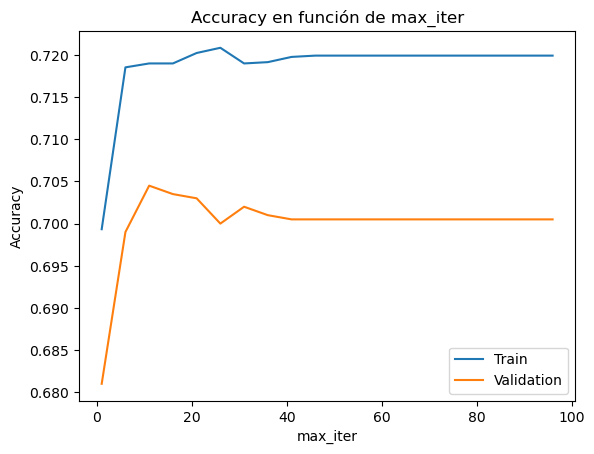

In [68]:
# Gráfica de accuracy en función de max_iter
import matplotlib.pyplot as plt

max_iters = range(1, 100, 5)
train_accuracies = []
validation_accuracies = []
for max_iter in max_iters:
    model = LogisticRegression(max_iter=max_iter)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    train_accuracies.append(accuracy_score(y_train, y_pred_train))
    y_pred_validation = model.predict(X_validation)
    validation_accuracies.append(accuracy_score(y_validation, y_pred_validation))

plt.plot(max_iters, train_accuracies, label='Train')
plt.plot(max_iters, validation_accuracies, label='Validation')
plt.xlabel('max_iter')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy en función de max_iter')
plt.show()

# Explicabilidad del modelo

## Explicabilidad global

In [81]:
from interpret.glassbox import LogisticRegression
from interpret import show

# Crear y entrenar modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Mostrar explicación
global_explanation = model.explain_global()
show(global_explanation)

<!-- http://127.0.0.1:7001/2695832946000/ -->

## Interpretabilidad local

In [82]:
# Mostrar la importancia de las variables en ejmplos
local_explanation = model.explain_local(X_validation, y_validation)
show(local_explanation)


<!-- http://127.0.0.1:7001/2695841155344/ -->

# Métricas del modelo final con datos de entrenamiento y test

In [85]:
# Entrenar modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Predecir en el conjunto de entrenamiento y test
y_pred_train = model.predict(X_train)
y_pred_validation = model.predict(X_validation)
y_pred_test = model.predict(X_test)

# Calcular accuracy en el conjunto de entrenamiento y test
train_accuracy = accuracy_score(y_train, y_pred_train)
validation_accuracy = accuracy_score(y_validation, y_pred_validation)
test_accuracy = accuracy_score(y_test, y_pred_test)

print('Train accuracy:', train_accuracy)
print('Validation accuracy:', validation_accuracy)
print('Test accuracy:', test_accuracy)

Train accuracy: 0.7199256850905713
Validation accuracy: 0.7005
Test accuracy: 0.7335805084745762


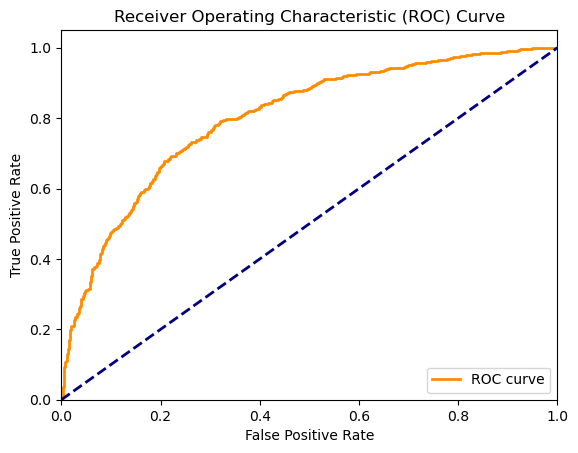

AUC: 0.802074269688916


In [88]:
# Curva ROC
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test.map({'Bad': 0, 'Good': 1}), model.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calcular AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test.map({'Bad': 0, 'Good': 1}), model.predict_proba(X_test)[:, 1])
print('AUC:', auc)